## Early Stopping

### --> early stopping is point or epoch where model stop learning or training neither it will leads to overfitting
### --> overfitting means model gives high accuracy at training phases but in testing phase it gives less accuracy 

In [33]:
import tensorflow as tf
import numpy
import pandas
from pylab import rcParams
import matplotlib
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [8]:
#!pip install mlxtend

In [11]:
#import pylab

#x = numpy.arange(1, 100, 5)
#y = numpy.sin(x)

#pylab.plot(x, y)
#pylab.xlabel('X Label')
#pylab.ylabel('Y Label')
#pylab.title('Title')
#pylab.show()

In [35]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [36]:
x

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [37]:
y.shape

(100,)

<Axes: >

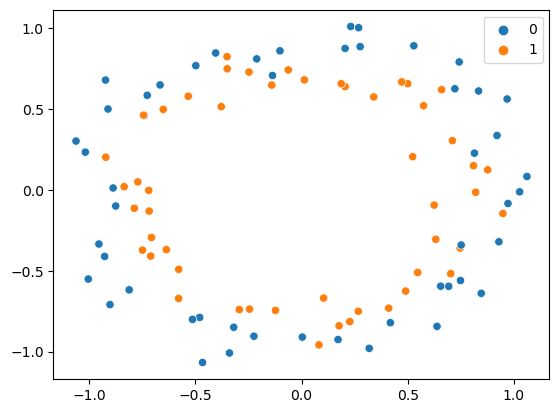

In [38]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [45]:
model = Sequential()
#input layer  26 neurons in one hidden layer and two input point
model.add(Dense(256, activation='relu', input_dim=2))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=3500, verbose=0)

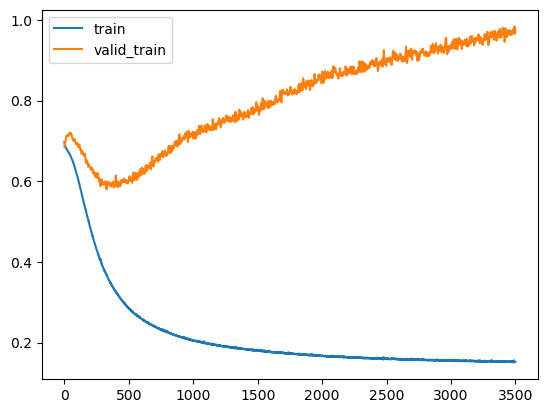

In [48]:
matplotlib.pyplot.plot(history.history['loss'], label='train')
matplotlib.pyplot.plot(history.history['val_loss'], label='valid_train')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

9600/9600 [==============================] - 5s 530us/step


<Axes: >

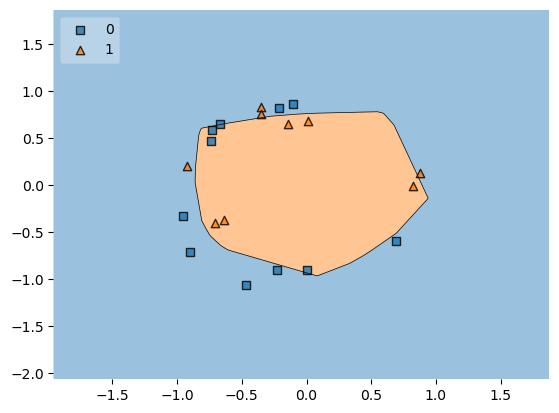

In [49]:
plot_decision_regions(x_test, y_test.ravel(), clf=model, legend=2)

# Early Stopping

In [59]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [62]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 58ms/step - loss: 0.6957 - accuracy: 0.5375 - val_loss: 0.6957 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6984 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6923 - accuracy: 0.5375 - val_loss: 0.6998 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6902 - accuracy: 0.5250 - val_loss: 0.7020 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.5375 - val_loss: 0.7040 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6881 - accuracy: 0.5250 - val_loss: 0.7062 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6872 - accuracy: 0.5250 - val_loss: 0.7086 - val_accuracy: 0.4500
Epoch 8/3500
3

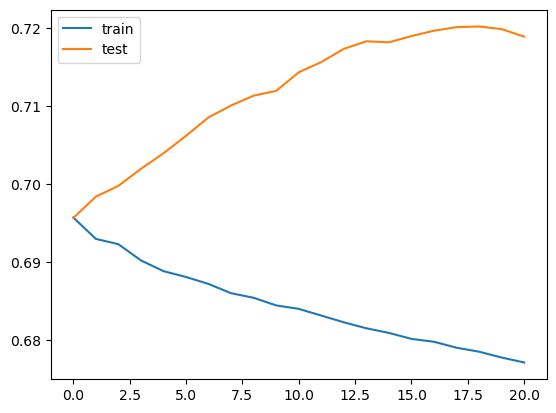

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 5s 561us/step


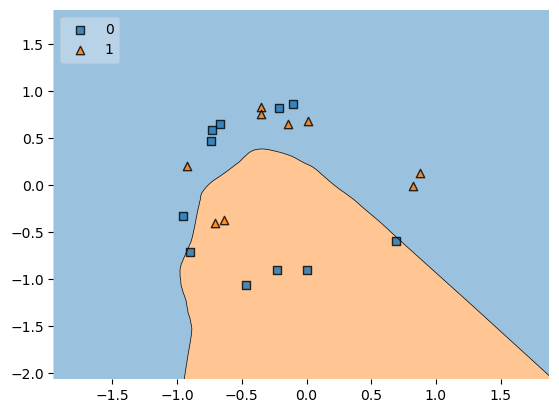

In [58]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()